# Trabajando con Datos Faltantes en Pandas

A lo largo de los siguientes ejercicios, descubrirás y trabajarás con datos faltantes en un conjunto de datos.

A lo largo de los siguientes ejercicios, descubrirás y trabajarás con datos faltantes en un conjunto de datos. Antes de comenzar este ejercicio de programación, te recomendamos encarecidamente ver la conferencia en video y completar la IVQ de los temas asociados.

Toda la información que necesitas para resolver esta tarea se encuentra en este cuaderno, y todo el código que implementarás se realizará dentro de este cuaderno.

A medida que avanzamos, encontrarás instrucciones sobre cómo instalar las bibliotecas necesarias a medida que surjan en este cuaderno. Antes de comenzar con los ejercicios y analizar los datos, debemos importar todas las bibliotecas y extensiones requeridas para este ejercicio de programación. A lo largo del curso, utilizaremos pandas, numpy, datetime para operaciones, y matplotlib, pyplot y seaborn para graficar.

Objetivo

Examinaremos los datos de rayos recopilados por la Administración Nacional Oceánica y Atmosférica (NOAA, por sus siglas en inglés) para el mes de agosto de 2018. Hay dos conjuntos de datos. El primero incluye cinco columnas:

|fecha|center_point_geom|longitud|latitud|number_of_strikes|
|---|---|---|---|---|

El segundo conjunto de datos contiene siete columnas:

|fecha|código_postal|ciudad|estado|código_estado|center_point_geom|number_of_strikes|
|---|---|---|---|---|---|---|

El primer conjunto de datos tiene dos columnas únicas:  `longitud`  y  `latitud` .
El segundo conjunto de datos tiene cuatro columnas únicas:  `código_postal` ,  `ciudad` ,  `estado`  y  `código_estado` .
Hay tres columnas que son comunes entre ellos:  `fecha` ,  `center_point_geom`  y  `number_of_strikes` .

Queremos combinar los dos conjuntos de datos en un solo dataframe que tenga toda la información de ambos conjuntos de datos. Idealmente, ambos conjuntos de datos tendrán el mismo número de entradas para las mismas ubicaciones en las mismas fechas. Si no lo tienen, investigaremos qué datos faltan.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('eda_missing_data_dataset1.csv')
print(df.columns)
# Cambiar los nombres de las columnas
df.columns = ["Fecha","Coordenadas","Longitud","Latitud","Cantidad"]
df.head()

Index(['date', 'center_point_geom', 'longitude', 'latitude',
       'number_of_strikes'],
      dtype='object')


Fecha        Coordenadas  Longitud  Latitud  Cantidad
0  2018-08-01  POINT(-81.6 22.6)     -81.6     22.6        48
1  2018-08-01  POINT(-81.1 22.6)     -81.1     22.6        32
2  2018-08-01  POINT(-80.9 22.6)     -80.9     22.6       118
3  2018-08-01  POINT(-80.8 22.6)     -80.8     22.6        69
4  2018-08-01  POINT(-98.4 22.8)     -98.4     22.8        44

In [3]:
df.shape

(717530, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717530 entries, 0 to 717529
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Fecha        717530 non-null  object 
 1   Coordenadas  717530 non-null  object 
 2   Longitud     717530 non-null  float64
 3   Latitud      717530 non-null  float64
 4   Cantidad     717530 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 27.4+ MB


In [4]:
# Leemos el segundo conjunto de datos
df_cod = pd.read_csv('eda_missing_data_dataset2.csv')
df_cod.columns

Index(['date', 'zip_code', 'city', 'state', 'state_code', 'center_point_geom',
       'number_of_strikes'],
      dtype='object')

In [5]:
df_cod.columns = ["Fecha","Codigo_Postal","Ciudad","Estado","Codigo_Estado",
                  "Coordenadas", "Cantidad"]
df_cod.head()

Fecha  Codigo_Postal                               Ciudad  \
0  2018-08-08           3281                                Weare   
1  2018-08-14           6488                 Heritage Village CDP   
2  2018-08-16          97759  Sisters city, Black Butte Ranch CDP   
3  2018-08-18           6776                      New Milford CDP   
4  2018-08-08           1077                            Southwick   

          Estado Codigo_Estado         Coordenadas  Cantidad  
0  New Hampshire            NH   POINT(-71.7 43.1)         1  
1    Connecticut            CT   POINT(-73.2 41.5)         3  
2         Oregon            OR  POINT(-121.4 44.3)         3  
3    Connecticut            CT   POINT(-73.4 41.6)        48  
4  Massachusetts            MA     POINT(-72.8 42)         2

In [7]:
print(df_cod.shape)
df_cod.info()

(323700, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323700 entries, 0 to 323699
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Fecha          323700 non-null  object
 1   Codigo_Postal  323700 non-null  int64 
 2   Ciudad         323700 non-null  object
 3   Estado         323700 non-null  object
 4   Codigo_Estado  323700 non-null  object
 5   Coordenadas    323700 non-null  object
 6   Cantidad       323700 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 17.3+ MB


Hmmm... Este conjunto de datos tiene menos de la mitad de filas que el primero. Pero, ¿cuáles son?

Lo primero que haremos para explorar esta discrepancia es unir los dos conjuntos de datos en un solo dataframe. Podemos hacer esto utilizando el método  `merge()`  de la clase  `DataFrame` . Para obtener más información sobre el método  `merge()` , consulta la [documentación de merge() de pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).

Comienza con el primer dataframe ( `df` ) y llama al método  `merge()`  en él. El primer argumento es un argumento posicional que especifica el dataframe con el que queremos fusionar, conocido como el dataframe  `right`  (el dataframe en el que estás llamando el método siempre es el dataframe  `left` ). El argumento  `how`  especifica qué claves del dataframe utilizaremos para hacer coincidir, y el argumento  `on`  nos permite definir las columnas a utilizar como claves.



____

Una demostración hará que sea más fácil de entender el merge()  

veremos diferentes ejemplos del método  `merge()` .

In [8]:
# Definimos df1
data = {'planet': ['Mercury', 'Venus', 'Earth', 'Mars',
            'Jupiter', 'Saturn', 'Uranus', 'Neptune'],
        'radius_km': [2440, 6052, 6371, 3390, 69911, 58232,
            25362, 24622],
        'moons': [0, 0, 1, 2, 80, 83, 27, 14]
         }
df1 = pd.DataFrame(data)
df1

planet  radius_km  moons
0  Mercury       2440      0
1    Venus       6052      0
2    Earth       6371      1
3     Mars       3390      2
4  Jupiter      69911     80
5   Saturn      58232     83
6   Uranus      25362     27
7  Neptune      24622     14

In [9]:
# Definimos df2
data = {'planet': ['Mercury', 'Venus', 'Earth', 'Meztli', 'Janssen'],
        'radius_km': [2440, 6052, 6371, 48654, 11959],
        'life?': ['no', 'no', 'yes', 'no', 'yes'],
         }
df2 = pd.DataFrame(data)
df2

planet  radius_km life?
0  Mercury       2440    no
1    Venus       6052    no
2    Earth       6371   yes
3   Meztli      48654    no
4  Janssen      11959   yes

Ahora vamos a fusionar los dos dataframes en las columnas  `['planet', 'radius_km']` . Intenta ejecutar la siguiente celda con cada uno de los siguientes argumentos para la palabra clave ** `how` **:  `'left'` ,  `'right'` ,  `'inner'`  y  `'outer'` . Observa cómo cada argumento cambia el resultado.

¡Siéntete libre de cambiar las columnas especificadas por el argumento ** `on` ** también!

In [16]:
merged_left = df1.merge(df2, how='left', on=['planet', 'radius_km'])
merged_left

planet  radius_km  moons life?
0  Mercury       2440      0    no
1    Venus       6052      0    no
2    Earth       6371      1   yes
3     Mars       3390      2   NaN
4  Jupiter      69911     80   NaN
5   Saturn      58232     83   NaN
6   Uranus      25362     27   NaN
7  Neptune      24622     14   NaN

In [15]:
merged_right = df1.merge(df2, how='right', on=['planet', 'radius_km'])
merged_right

planet  radius_km  moons life?
0  Mercury       2440    0.0    no
1    Venus       6052    0.0    no
2    Earth       6371    1.0   yes
3   Meztli      48654    NaN    no
4  Janssen      11959    NaN   yes

In [12]:
merged_inner = df1.merge(df2, how='inner', on=['planet', 'radius_km'])
merged_inner

planet  radius_km  moons life?
0  Mercury       2440      0    no
1    Venus       6052      0    no
2    Earth       6371      1   yes

In [14]:
merged_outer = df1.merge(df2, how='outer', on=['planet', 'radius_km'])
merged_outer

planet  radius_km  moons life?
0  Mercury       2440    0.0    no
1    Venus       6052    0.0    no
2    Earth       6371    1.0   yes
3     Mars       3390    2.0   NaN
4  Jupiter      69911   80.0   NaN
5   Saturn      58232   83.0   NaN
6   Uranus      25362   27.0   NaN
7  Neptune      24622   14.0   NaN
8   Meztli      48654    NaN    no
9  Janssen      11959    NaN   yes

_____

In [19]:
# Left-join the two datasets
df_joined = df.merge(df_cod, how='left', on=['Fecha','Coordenadas'])
df_joined.head()

Fecha        Coordenadas  Longitud  Latitud  Cantidad_x  \
0  2018-08-01  POINT(-81.6 22.6)     -81.6     22.6          48   
1  2018-08-01  POINT(-81.1 22.6)     -81.1     22.6          32   
2  2018-08-01  POINT(-80.9 22.6)     -80.9     22.6         118   
3  2018-08-01  POINT(-80.8 22.6)     -80.8     22.6          69   
4  2018-08-01  POINT(-98.4 22.8)     -98.4     22.8          44   

   Codigo_Postal Ciudad Estado Codigo_Estado  Cantidad_y  
0            NaN    NaN    NaN           NaN         NaN  
1            NaN    NaN    NaN           NaN         NaN  
2            NaN    NaN    NaN           NaN         NaN  
3            NaN    NaN    NaN           NaN         NaN  
4            NaN    NaN    NaN           NaN         NaN

Observa que el nuevo dataframe tiene todas las columnas de ambos dataframes originales, y tiene dos columnas  `Cantidad`  que están sufijadas con  `_x`  y  `_y` . Esto se debe a que las columnas clave de ambos dataframes eran las mismas, por lo que aparecen una vez en el dataframe fusionado. Las columnas únicas de cada dataframe original también aparecen en el dataframe fusionado. Pero ambos dataframes originales tenían otra columna,  `Cantidad` , que tenía el mismo nombre en ambos dataframes y no se indicó como clave. Pandas maneja esto agregando ambas columnas al nuevo dataframe.

Ahora vamos a verificar el resumen de este conjunto de datos fusionado.

In [20]:
df_joined.describe()

Longitud        Latitud     Cantidad_x  Codigo_Postal  \
count  717530.000000  717530.000000  717530.000000  323700.000000   
mean      -90.875445      33.328572      21.637081   57931.958996   
std        13.648429       7.938831      48.029525   22277.327411   
min      -133.900000      16.600000       1.000000    1002.000000   
25%      -102.800000      26.900000       3.000000   38260.750000   
50%       -90.300000      33.200000       6.000000   59212.500000   
75%       -80.900000      39.400000      21.000000   78642.000000   
max       -43.800000      51.700000    2211.000000   99402.000000   

          Cantidad_y  
count  323700.000000  
mean       25.410587  
std        57.421824  
min         1.000000  
25%         3.000000  
50%         8.000000  
75%        24.000000  
max      2211.000000

La información de recuento confirma que el nuevo dataframe tiene datos faltantes.

Ahora vamos a verificar cuántas ubicaciones de estado faltantes tenemos utilizando  `isnull()`  para crear una máscara booleana que aplicaremos a  `df_joined` . La máscara es un objeto de la serie de pandas que contiene  `True`  para cada fila con un valor de  `Codigo_Estado`  faltante y  `False`  para cada fila que no tiene datos faltantes en esta columna. Cuando se aplica la máscara a  `df_joined` , filtra las filas que no tienen datos faltantes en  `Codigo_Estado` . (Ten en cuenta que el uso de la columna  `Codigo_Estado`  para crear esta máscara es una decisión arbitraria. Podríamos haber seleccionado  `Codigo_Postal` ,  `Ciudad`  o  `Estado`  en su lugar y obtenido los mismos resultados.)

In [22]:
# Create a new df of just the rows that are missing data
df_null_geo = df_joined[pd.isnull(df_joined.Codigo_Estado)]
df_null_geo.shape

(393830, 10)

Podemos confirmar que  `df_null_geo`  contiene solo las filas con los valores faltantes de  `Codigo_Estado`  utilizando el método  `info()`  en  `df_joined`  y comparando.

In [23]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717530 entries, 0 to 717529
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Fecha          717530 non-null  object 
 1   Coordenadas    717530 non-null  object 
 2   Longitud       717530 non-null  float64
 3   Latitud        717530 non-null  float64
 4   Cantidad_x     717530 non-null  int64  
 5   Codigo_Postal  323700 non-null  float64
 6   Ciudad         323700 non-null  object 
 7   Estado         323700 non-null  object 
 8   Codigo_Estado  323700 non-null  object 
 9   Cantidad_y     323700 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 60.2+ MB


Si restamos las 323,700 filas no nulas en las columnas 5-9 de  `df_joined`  de las 717,530 filas no nulas en las columnas 0-4 de  `df_joined` , nos quedan 393,830 filas que contienen datos faltantes, el mismo número de filas que contiene  `df_null_geo` .

In [24]:
df_null_geo.head()

Fecha        Coordenadas  Longitud  Latitud  Cantidad_x  \
0  2018-08-01  POINT(-81.6 22.6)     -81.6     22.6          48   
1  2018-08-01  POINT(-81.1 22.6)     -81.1     22.6          32   
2  2018-08-01  POINT(-80.9 22.6)     -80.9     22.6         118   
3  2018-08-01  POINT(-80.8 22.6)     -80.8     22.6          69   
4  2018-08-01  POINT(-98.4 22.8)     -98.4     22.8          44   

   Codigo_Postal Ciudad Estado Codigo_Estado  Cantidad_y  
0            NaN    NaN    NaN           NaN         NaN  
1            NaN    NaN    NaN           NaN         NaN  
2            NaN    NaN    NaN           NaN         NaN  
3            NaN    NaN    NaN           NaN         NaN  
4            NaN    NaN    NaN           NaN         NaN

Ahora que hemos fusionado todos nuestros datos y hemos aislado las filas con datos faltantes, podemos comprender mejor qué datos faltan al graficar la longitud y latitud de las ubicaciones que carecen de datos de ciudad, estado y código postal.

In [26]:
top_missing = df_null_geo[
    ['Latitud','Longitud','Cantidad_x']]\
    .groupby(['Latitud','Longitud'])\
    .sum(numeric_only=True)\
    .sort_values('Cantidad_x',ascending=False)\
    .reset_index()

top_missing.head(10)

Latitud  Longitud  Cantidad_x
0     22.4     -84.2        3841
1     22.9     -82.9        3184
2     22.4     -84.3        2999
3     22.9     -83.0        2754
4     22.5     -84.1        2746
5     22.5     -84.2        2738
6     22.3     -81.0        2680
7     22.9     -82.4        2652
8     22.9     -82.3        2618
9     22.3     -84.3        2551

Importemos Plotly para reducir el tamaño del dataframe a medida que creamos un gráfico de dispersión geográfico.

Para instalar Plotly

```bash
pip install plotly
```

In [30]:
import plotly.express as px  
# Asegúrate de importar express
# reduce el tamaño del dataframe para evitar problemas
fig = px.scatter_geo( top_missing [ top_missing.Cantidad_x >= 300],  # DataFrame de entrada de Pandas
                    lat="Latitud",  # Columna del DataFrame con la latitud
                    lon="Longitud",  # Columna del DataFrame con la longitud
                    size="Cantidad_x") # Establece el tamaño del gráfico según el número de rayos
fig.update_layout(
    title_text = 'Datos faltantes', # Crea un título
)

fig.show()

Es una bonita visualización geográfica, pero realmente no necesitamos la escala global. Vamos a reducirlo solo al área geográfica que nos interesa: Estados Unidos.

In [32]:
fig = px.scatter_geo( top_missing [ top_missing.Cantidad_x >= 300],  # DataFrame de entrada de Pandas
                    lat="Latitud",  # Columna del DataFrame con la latitud
                    lon="Longitud",  # Columna del DataFrame con la longitud
                    size="Cantidad_x") # Establece el tamaño del gráfico según el número de rayos
fig.update_layout(
    title_text = 'Datos faltantes', # Crea un título
    geo_scope='usa',)

fig.show()

¡Esto explica por qué faltaban tantas filas de datos de estado y código postal! La mayoría de estos rayos ocurrieron sobre el agua: el océano Atlántico, el Mar de Cortés, el Golfo de México, el Mar Caribe y los Grandes Lagos. De los rayos que ocurrieron sobre tierra, la mayoría de ellos fueron en México, las Bahamas y Cuba, lugares fuera de los Estados Unidos y sin códigos postales estadounidenses. No obstante, algunos de los datos faltantes son de Florida y otros lugares dentro de Estados Unidos, y podríamos querer preguntar al propietario de la base de datos al respecto.

____

# Identificar y manejar valores atípicos

A lo largo de los siguientes ejercicios, aprenderás a encontrar y manejar valores atípicos en un conjunto de datos.

Toda la información que necesitas para resolver esta tarea se encuentra en este cuaderno, y todo el código que implementarás se realizará dentro de este cuaderno.

A medida que avanzamos, encontrarás instrucciones sobre cómo instalar las bibliotecas necesarias a medida que surjan en este cuaderno. Antes de comenzar con los ejercicios y analizar los datos, debemos importar todas las bibliotecas y extensiones requeridas para este ejercicio de programación. A lo largo del curso, utilizaremos pandas, numpy, datetime para operaciones, y matplotlib, pyplot y seaborn para graficar.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df_out = pd.read_csv('eda_outliers_dataset1.csv')


In [5]:
df_out.columns = ["año","rayos"]

In [19]:
df_out.shape

(34, 3)

In [6]:
df_out.head(10)

año     rayos
0  2020  15620068
1  2019    209166
2  2018  44600989
3  2017  35095195
4  2016  41582229
5  2015  37894191
6  2014  34919173
7  2013  27600898
8  2012  28807552
9  2011  31392058

A continuación, vamos a convertir el valor del número de rayos a un formato más legible en el gráfico (por ejemplo, convertir 100,000 a 100K, 3,000,000 a 3M, y así sucesivamente).

In [7]:
def readable_numbers(x):
    """toma un número grande y lo formatea en K, M para que sea más legible"""
    if x >= 1e6:
        s = '{:1.1f}M'.format(x*1e-6)
    else:
        s = '{:1.0f}K'.format(x*1e-3)
    return s

# Utiliza la función readable_numbers() para crear una nueva columna
df_out["Cantidad_de_rayos"] = df_out.rayos.apply(readable_numbers)

In [8]:
df_out.head()

año     rayos Cantidad_de_rayos
0  2020  15620068             15.6M
1  2019    209166              209K
2  2018  44600989             44.6M
3  2017  35095195             35.1M
4  2016  41582229             41.6M

In [13]:
print("Promedio:" + readable_numbers(np.mean(df_out.rayos)))
print("Mediana :" + readable_numbers(np.median(df_out.rayos)))

Promedio:26.8M
Mediana :28.3M


Un diagrama de caja puede ayudar a desglosar visualmente los datos en percentiles / cuartiles, que son estadísticas resumidas importantes. El centro sombreado de la caja representa el percentil 50 del conjunto de datos. Esto es el rango intercuartílico, o IQR.

Las "barbas" del diagrama de caja se extienden 1.5 veces el IQR de forma predeterminada.

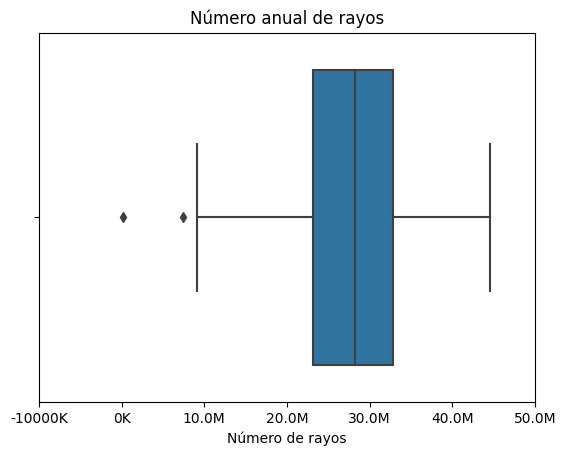

In [14]:
box = sns.boxplot(x=df_out['rayos'])
g = plt.gca()

# Obtener las ubicaciones actuales de las etiquetas
xtick_locs = g.get_xticks()

# Obtener las etiquetas personalizadas usando la función readable_numbers
xtick_labels = [readable_numbers(x) for x in xtick_locs]

# Establecer las ubicaciones y etiquetas personalizadas
g.set_xticks(xtick_locs)
g.set_xticklabels(xtick_labels)

plt.xlabel('Número de rayos')
plt.title('Número anual de rayos')
plt.show()

Los puntos a la izquierda del bigote izquierdo son valores atípicos. Cualquier observación que esté más de 1.5 veces el rango intercuartílico (IQR) por debajo del primer cuartil (Q1) o más de 1.5 veces el IQR por encima del tercer cuartil (Q3) se considera un valor atípico.

Un punto importante para todo profesional de datos: no se debe asumir que un valor atípico es erróneo a menos que haya una explicación o razón para hacerlo.

Definamos nuestro IQR, límite superior e inferior.

In [16]:
# Calcular el percentil 25 de los rayos anuales
percentil25 = df_out['rayos'].quantile(0.25)

# Calcular el percentil 75 de los rayos anuales
percentil75 = df_out.rayos.quantile(0.75)

# Calcular el rango intercuartílico
iqr = percentil75 - percentil25

# Calcular los límites superior e inferior para los valores atípicos
limite_superior = percentil75 + 1.5 * iqr
limite_inferior = percentil25 - 1.5 * iqr

print('El límite inferior es: ' + readable_numbers(limite_inferior))

El límite inferior es: 8.6M


Ahora podemos usar una máscara booleana para seleccionar solo las filas del dataframe donde el número de rayos es menor que el límite inferior que calculamos anteriormente. Estas filas son los valores atípicos en el extremo inferior.

In [17]:
# Isolate outliers on low end
df_out[df_out.rayos < limite_inferior]

año    rayos Cantidad_de_rayos
1   2019   209166              209K
33  1987  7378836              7.4M

Obtengamos una visualización de todos los puntos de datos con los valores atípicos coloreados en rojo.

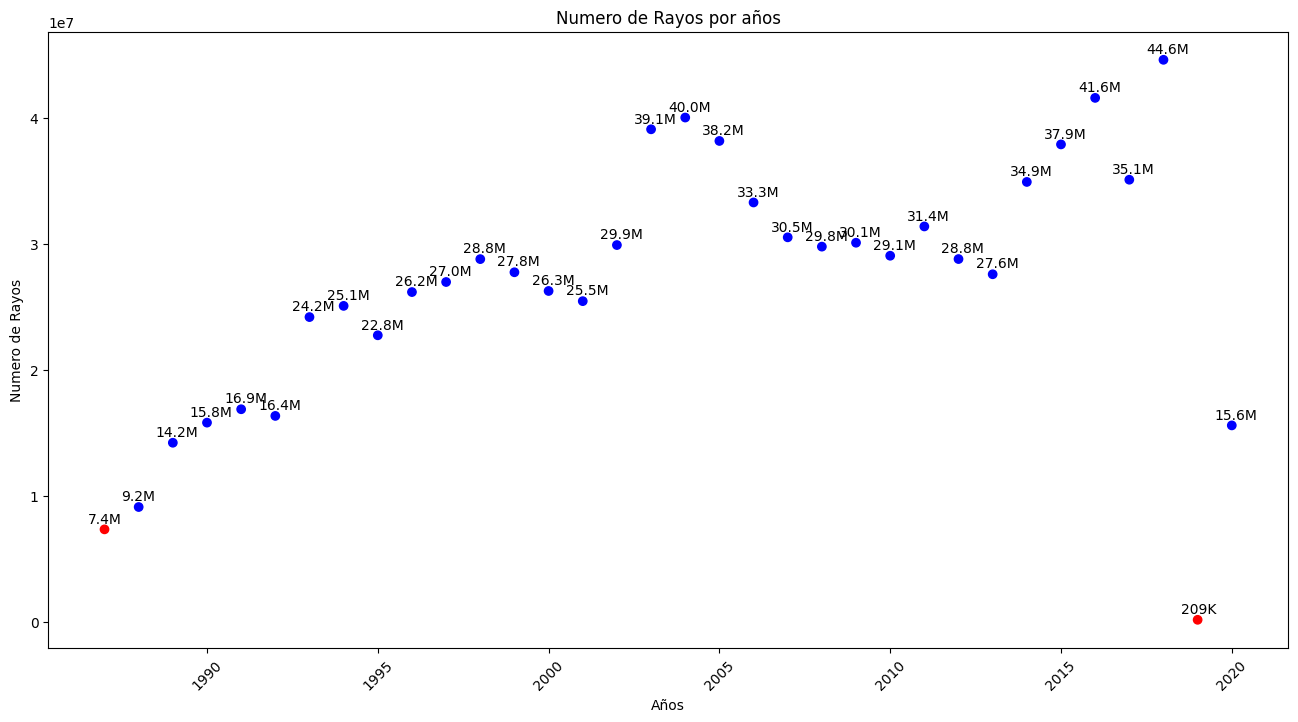

In [18]:
def agrega_etiquetas(x,y):
    for i in range(len(x)):
        plt.text(x[i]-0.5, y[i]+500000, s=readable_numbers(y[i]))

colors = np.where(df_out.rayos < limite_inferior, 'r', 'b')

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_out['año'], df_out['rayos'],c=colors)
ax.set_xlabel('Años')
ax.set_ylabel('Numero de Rayos')
ax.set_title('Numero de Rayos por años')
agrega_etiquetas(df_out['año'], df_out['rayos'])
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

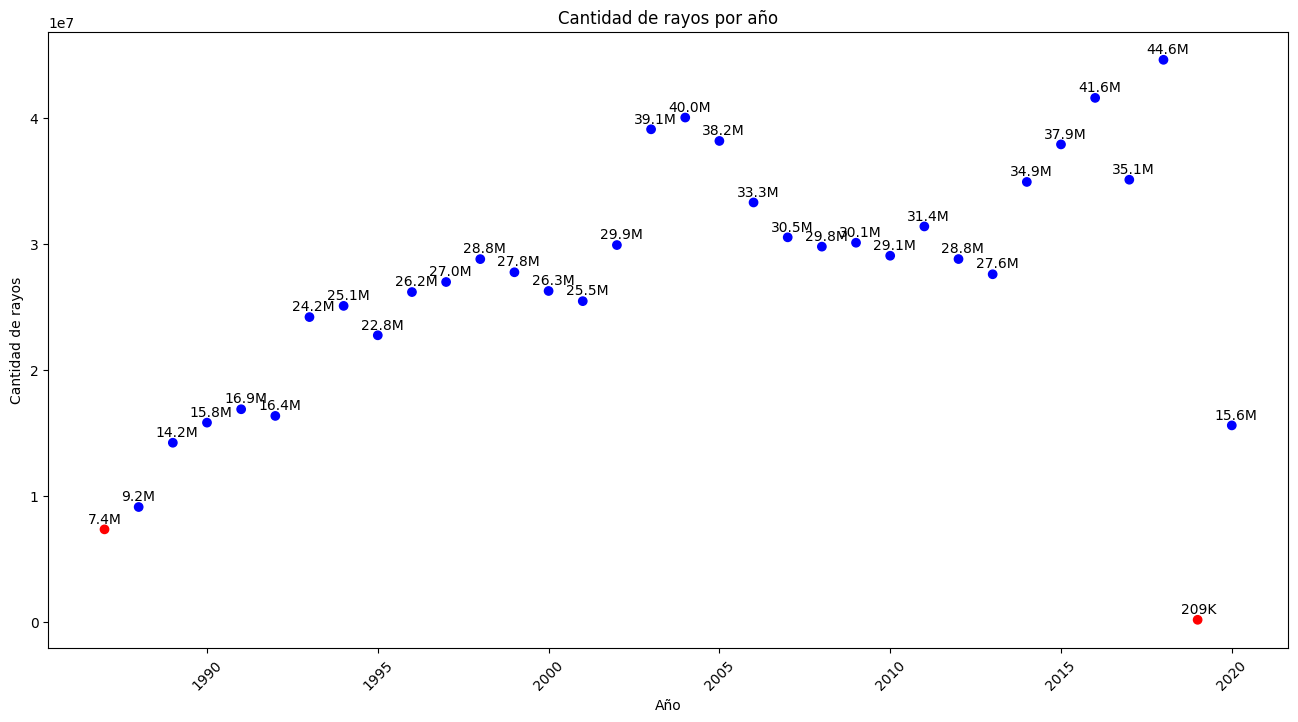

In [53]:
def addlabels(x, y):
    """
    Agrega etiquetas a los puntos de un gráfico de dispersión.
    """
    for i in range(len(x)):
        # Agrega una etiqueta de texto en la posición (x[i]-0.5, y[i]+500000)
        # utilizando la función readable_numbers para formatear el texto de la etiqueta
        plt.text(x[i]-0.5, y[i]+500000, s=readable_numbers(y[i]))

# Crea una matriz de colores basada en si la cantidad de rayos es menor que un límite inferior
colors = np.where(df_out['number_of_strikes'] < limite_inferior, 'r', 'b')

# Crea una figura y ejes para el gráfico
fig, ax = plt.subplots(figsize=(16, 8))

# Crea un gráfico de dispersión con los años en el eje x y la cantidad de rayos en el eje y,
# utilizando la matriz de colores para la apariencia de los puntos
ax.scatter(df_out['year'], df_out['number_of_strikes'], c=colors)

# Establece las etiquetas de los ejes x e y y el título del gráfico
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad de rayos')
ax.set_title('Cantidad de rayos por año')

# Agrega las etiquetas a los puntos utilizando la función addlabels
addlabels(df_out['year'], df_out['number_of_strikes'])

# Establece la rotación de las etiquetas del eje x en 45 grados
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

# Muestra el gráfico
plt.show()

### Investigando los valores atípicos de 2019 y 1987

Vamos a examinar un poco más de cerca los dos años atípicos. En la sección anterior, utilizamos un conjunto de datos preprocesado que no incluía mucha de la información que estamos acostumbrados a tener en estos datos. Para investigar más a fondo los años atípicos, necesitaremos más información, por lo que vamos a importar datos específicos de estos años.

In [20]:
df_2019 = pd.read_csv('eda_outliers_dataset2.csv')

In [22]:
df_2019.shape

(54831, 3)

In [23]:
df_2019.columns

Index(['date', 'number_of_strikes', 'center_point_geom'], dtype='object')

In [24]:
df_2019.columns = ["fecha","rayos","coordenadas"]

In [25]:
df_2019.head()

fecha  rayos        coordenadas
0  2019-12-01      1  POINT(-79.7 35.3)
1  2019-12-01      1  POINT(-84.7 39.3)
2  2019-12-01      1  POINT(-83.4 38.9)
3  2019-12-01      1  POINT(-71.5 35.2)
4  2019-12-01      1  POINT(-87.8 41.6)

Primero, convertiremos la columna  `fecha`  a formato datetime. Esto nos permitirá extraer dos nuevas columnas:  `mes`  y  `mes_txt` . Luego, ordenaremos los datos por  `mes`  y  `mes_txt` , los sumaremos y ordenaremos los valores.

In [33]:
# Convert `date` column to datetime
df_2019['Fecha']= pd.to_datetime(df_2019['fecha'])

# Create 2 new columns
df_2019['mes']     = df_2019['Fecha'].dt.month
df_2019['mes_txt'] = df_2019["Fecha"].dt.month_name(locale="es_ES.UTF-8")\
                                     .str.slice(stop=3)

# Group by `month` and `month_txt`, sum it, and sort. Assign result to new df
df_2019_por_mes = df_2019.groupby(['mes','mes_txt'])\
    .sum(numeric_only=True)\
    .sort_values('mes', ascending=True)\
    .head(12).reset_index()
df_2019_por_mes

mes mes_txt   rayos
0   12     Dic  209166

El año 2019 parece tener datos solo para el mes de diciembre. La probabilidad de que no haya habido ningún rayo de enero a noviembre de 2019 es aproximadamente 0. Esto parece ser un caso de datos faltantes. Probablemente deberíamos excluir el año 2019 del análisis (para la mayoría de los casos de uso).

In [29]:
df_1987 = pd.read_csv('eda_outliers_dataset3.csv')

In [32]:
# Convert `date` column to datetime
df_1987['Fecha']= pd.to_datetime(df_1987['date'])

# Create 2 new columns
df_1987['mes'] = df_1987['Fecha'].dt.month
df_1987['mes_txt'] = df_1987["Fecha"].dt.month_name(locale="es_ES.UTF-8")\
                                     .str.slice(stop=3)

# Group by `month` and `month_txt`, sum it, and sort. Assign result to new df
df_1987_por_mes = df_1987.groupby(['mes','mes_txt'])\
    .sum(numeric_only=True)\
    .sort_values("mes", ascending=True)\
    .reset_index()
df_1987_por_mes

mes mes_txt  number_of_strikes
0     1     Ene              23044
1     2     Feb              61020
2     3     Mar             117877
3     4     Abr             157890
4     5     May             700910
5     6     Jun            1064166
6     7     Jul            2077619
7     8     Ago            2001899
8     9     Sep             869833
9    10     Oct             105627
10   11     Nov             155290
11   12     Dic              43661

1987 tiene datos para todos los meses del año. Por lo tanto, este valor atípico debe tratarse de manera diferente a 2019, que tiene datos faltantes.

Finalmente, volvamos a calcular la media y la mediana después de eliminar los valores atípicos. Nuestra conclusión final de nuestra lección sobre valores atípicos es que los valores atípicos afectan significativamente la media del conjunto de datos, pero no afectan significativamente la mediana.

Para eliminar los valores atípicos, utilizaremos una máscara booleana para crear un nuevo dataframe que contenga solo las filas del dataframe original donde el número de rayos sea mayor o igual al límite inferior que calculamos anteriormente.

In [35]:
# Crear un nuevo dataframe que elimine los valores atípicos
df_sin_atipicos = df_out[df_out.rayos >= limite_inferior]

# Volver a calcular los valores de media y mediana en los datos sin valores atípicos
print("Promedio: " + readable_numbers(np.mean(df_sin_atipicos.rayos)))
print("Mediana : " + readable_numbers(np.median(df_sin_atipicos.rayos)))

Promedio: 28.2M
Mediana : 28.8M


Tanto la media como la mediana cambiaron, pero la media lo hizo mucho más. Es evidente que los valores atípicos pueden afectar las distribuciones de los datos y las conclusiones que se pueden extraer de ellos.

# Codificación de etiquetas

## Objetivo

Examinaremos los datos mensuales de rayos recopilados por la Administración Nacional Oceánica y Atmosférica (NOAA, por sus siglas en inglés) para los años 2016-2018. El conjunto de datos incluye tres columnas:

|fecha|number_of_strikes|center_point_geom|
|---|---|---|

El objetivo es asignar el número mensual de rayos a las siguientes categorías: leve, disperso, fuerte o severo. Luego crearemos un mapa de calor de los tres años para poder obtener una comprensión general de la severidad mensual de los rayos a partir de un diagrama simple.

In [15]:
df = pd.read_csv('eda_label_encoding_dataset.csv')

In [16]:
df.shape

(10479003, 3)

In [17]:
df.columns = ["fecha","rayos","coordenadas"]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479003 entries, 0 to 10479002
Data columns (total 3 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   fecha        object
 1   rayos        int64 
 2   coordenadas  object
dtypes: int64(1), object(2)
memory usage: 239.8+ MB


### Crear una variable categórica  `intensidad` 

Comienza convirtiendo la columna  `fecha`  a formato de fecha y hora. Luego crearemos una nueva columna  `mes`  que contenga las primeras tres letras de cada mes.

In [19]:
# Convert `date` column to datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Create new `month` column
df['mes'] = df['fecha'].dt.month_name(locale="es_ES.UTF-8").str.slice(stop=3)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479003 entries, 0 to 10479002
Data columns (total 4 columns):
 #   Column       Dtype         
---  ------       -----         
 0   fecha        datetime64[ns]
 1   rayos        int64         
 2   coordenadas  object        
 3   mes          object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 319.8+ MB


In [21]:
df.head()

fecha  rayos         coordenadas  mes
0 2016-08-05     16  POINT(-101.5 24.7)  Ago
1 2016-08-05     16     POINT(-85 34.3)  Ago
2 2016-08-05     16     POINT(-89 41.4)  Ago
3 2016-08-05     16   POINT(-89.8 30.7)  Ago
4 2016-08-05     16   POINT(-86.2 37.9)  Ago

A continuación, codificaremos los meses como información categórica. Esto nos permite designarlos específicamente como categorías que siguen un orden específico, lo cual es útil cuando los representamos gráficamente más tarde. También crearemos una nueva columna llamada  `año` . Luego agruparemos los datos por año y mes, sumaremos las columnas restantes y asignaremos los resultados a un nuevo dataframe.

In [22]:
# Crear designaciones categóricas
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Codificar la columna 'mes' como categórica
df['mes'] = pd.Categorical(df['mes'], categories=meses, ordered=True)

# Crear la columna 'año' extrayendo la información del año del objeto datetime
df['año'] = df['fecha'].dt.strftime('%Y') # devuelve un string
# df['año'] = df['fecha'].dt.year # devuelve un entero


# Crear un nuevo dataframe de mes, año y total de huelgas
df_por_mes = df.groupby(['año', 'mes']).sum(numeric_only=True).reset_index()
df_por_mes.head()

año  mes    rayos
0  2016  Ene   313595
1  2016  Feb   312676
2  2016  Mar  2057527
3  2016  Abr  2636427
4  2016  May  5800500

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479003 entries, 0 to 10479002
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   fecha        datetime64[ns]
 1   rayos        int64         
 2   coordenadas  object        
 3   mes          category      
 4   año          object        
dtypes: category(1), datetime64[ns](1), int64(1), object(2)
memory usage: 329.8+ MB


Ahora crearemos una nueva columna llamada  `intensidad`  que contendrá una variable categórica que representa los rayos para cada mes como leve, disperso, fuerte o severo. La función  `pd.qcut`  de pandas hace esto fácil. Simplemente ingresamos la columna que queremos categorizar, el número de cuantiles en los que queremos ordenar los datos y cómo queremos nombrar cada cuantil. Para obtener más información sobre esta función, consulta la [documentación de pandas qcut()](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html).

In [24]:
# Crea una nueva columna que categoriza el número de rayos en una de las 4 categorías
df_por_mes['intensidad'] = pd.qcut(
    df_por_mes['rayos'],
    4,
    labels=['Leve', 'Disperso', 'Fuerte', 'Severo'])

df_por_mes.head()

año  mes    rayos intensidad
0  2016  Ene   313595       Leve
1  2016  Feb   312676       Leve
2  2016  Mar  2057527   Disperso
3  2016  Abr  2636427     Fuerte
4  2016  May  5800500     Severo

### Codificar  `intensidad`  en valores numéricos

Ahora que tenemos una columna categórica  `intensidad` , podemos extraer un código numérico de ella utilizando  `.cat.codes`  y asignar este número a una nueva columna.

In [25]:
# Crea una nueva columna que representa el valor numérico del nivel de rayos
df_por_mes['intensidad_num'] = df_por_mes['intensidad'].cat.codes
df_por_mes.head()

año  mes    rayos intensidad  intensidad_num
0  2016  Ene   313595       Leve               0
1  2016  Feb   312676       Leve               0
2  2016  Mar  2057527   Disperso               1
3  2016  Abr  2636427     Fuerte               2
4  2016  May  5800500     Severo               3

También podemos crear variables binarias "dummy" a partir de la columna  `intensidad` . Esta es una herramienta útil si queremos pasar la variable categórica a un modelo. Para hacer esto, podríamos usar la función  `pd.get_dummies()` . Ten en cuenta que esto es solo para demostrar la funcionalidad de  `pd.get_dummies()` . Simplemente llamar a la función como lo hacemos a continuación no convertirá los datos a menos que volvamos a asignar el resultado a un dataframe.

 `pd.get_dummies(df['columna'])`  🠚 **df sin cambios**  
 `df = pd.get_dummies(df['columna'])`  🠚 **df cambiado**

In [26]:
pd.get_dummies(df_por_mes['intensidad'])

Leve  Disperso  Fuerte  Severo
0      1         0       0       0
1      1         0       0       0
2      0         1       0       0
3      0         0       1       0
4      0         0       0       1
5      0         0       0       1
6      0         0       0       1
7      0         0       0       1
8      0         0       1       0
9      0         1       0       0
10     1         0       0       0
11     1         0       0       0
12     0         1       0       0
13     1         0       0       0
14     0         1       0       0
15     0         0       1       0
16     0         0       1       0
17     0         0       1       0
18     0         0       0       1
19     0         0       0       1
20     0         0       1       0
21     0         1       0       0
22     1         0       0       0
23     1         0       0       0
24     0         1       0       0
25     0         0       1       0
26     0         1       0       0
27     0         1       0       0
28     0         0       1       0
29     0         0       0       1
30     0         0       0       1
31     0         0       0       1
32     0         0       1       0
33     0         1       0       0
34     1         0       0       0
35     1         0       0       0

No es necesario crear variables dummy para nuestro mapa de calor, así que continuemos sin convertir el dataframe.

### Crear un mapa de calor del número de rayos por mes

Queremos que nuestro mapa de calor tenga los meses en el eje x y los años en el eje y, y que la escala de colores represente la gravedad (leve, disperso, fuerte, severo) de los rayos para cada mes. Una forma sencilla de preparar los datos para el mapa de calor es pivotarlos de manera que las filas sean los años, las columnas sean los meses y los valores sean el código numérico de la gravedad de los rayos.

Podemos hacer esto utilizando el método  `df.pivot()` . Acepta argumentos para  `index` ,  `columns`  y  `values` , que especificaremos como se describe. Para obtener más información sobre el método  `df.pivot()` , consulta la [documentación del método pivot() de pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html).

In [28]:
df_por_mes_plot = df_por_mes.pivot(
    index   = "año",
    columns = "mes",
    values  = "intensidad_num")

df_por_mes_plot

mes   Ene  Feb  Mar  Abr  May  Jun  Jul  Ago  Sep  Oct  Nov  Dic
año                                                             
2016    0    0    1    2    3    3    3    3    2    1    0    0
2017    1    0    1    2    2    2    3    3    2    1    0    0
2018    1    2    1    1    2    3    3    3    2    1    0    0

In [29]:
import seaborn as sns

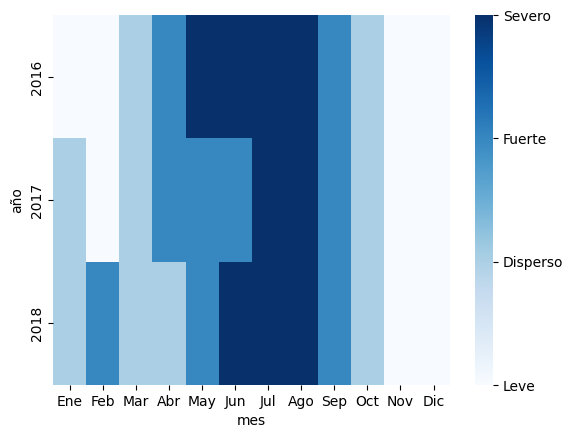

In [30]:
ax = sns.heatmap(df_por_mes_plot, cmap = 'Blues')
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0, 1, 2, 3])
colorbar.set_ticklabels(['Leve', 'Disperso', 'Fuerte', 'Severo'])
plt.show()

El mapa de calor indica que durante los tres años, la mayoría de los rayos ocurrieron durante los meses de verano. Un mapa de calor es una forma fácil de entender una gran cantidad de datos en una sola gráfica.

¡Si has completado exitosamente el material anterior, felicidades! Ahora comprendes cómo realizar la codificación de etiquetas en Python y deberías poder comenzar a utilizar estas habilidades en tus propios conjuntos de datos.

# Validación de entrada

A lo largo de los siguientes ejercicios, practicarás la validación de entrada en Python.

## Objetivo

Examinaremos los datos mensuales de rayos recopilados por la Administración Nacional Oceánica y Atmosférica (NOAA) para el año 2018. El conjunto de datos incluye cinco columnas:

|fecha|rayos|coordenadas|longitud|latitud|
|---|---|---|---|---|

El objetivo es inspeccionar los datos y validar la calidad de su contenido. Verificaremos:

* Valores nulos
* Fechas faltantes
* Un rango plausible de rayos diarios en una ubicación
* Un rango geográfico que se ajuste a las expectativas

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px 
import seaborn as sns

In [73]:
df = pd.read_csv('eda_input_validation_joining_dataset1.csv')

In [74]:
print(df.columns)
df.columns = ["fecha","rayos", "coordenadas", "longitud","latitud"]
print(df.columns)


Index(['date', 'number_of_strikes', 'center_point_geom', 'longitude',
       'latitude'],
      dtype='object')
Index(['fecha', 'rayos', 'coordenadas', 'longitud', 'latitud'], dtype='object')


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   fecha        object 
 1   rayos        int64  
 2   coordenadas  object 
 3   longitud     float64
 4   latitud      float64
dtypes: float64(2), int64(1), object(2)
memory usage: 129.7+ MB


In [76]:
df.head()

fecha  rayos      coordenadas  longitud  latitud
0  2018-01-03    194    POINT(-75 27)     -75.0     27.0
1  2018-01-03     41  POINT(-78.4 29)     -78.4     29.0
2  2018-01-03     33  POINT(-73.9 27)     -73.9     27.0
3  2018-01-03     38  POINT(-73.8 27)     -73.8     27.0
4  2018-01-03     92    POINT(-79 28)     -79.0     28.0

In [77]:
df['fecha'] = pd.to_datetime(df['fecha'])

Ahora realizaremos algunas validaciones de datos. Comenzamos contando la cantidad de valores faltantes en cada columna.

In [78]:
df.isnull().sum()

fecha          0
rayos          0
coordenadas    0
longitud       0
latitud        0
dtype: int64

Comprobamos los rangos de todas las variables

In [79]:
df.describe(include = 'all', datetime_is_numeric = True)

fecha         rayos        coordenadas  \
count                         3401012  3.401012e+06            3401012   
unique                            NaN           NaN             170855   
top                               NaN           NaN  POINT(-81.5 22.5)   
freq                              NaN           NaN                108   
mean    2018-07-13 03:32:02.018504960  1.311403e+01                NaN   
min               2018-01-01 00:00:00  1.000000e+00                NaN   
25%               2018-06-04 00:00:00  2.000000e+00                NaN   
50%               2018-07-18 00:00:00  4.000000e+00                NaN   
75%               2018-08-24 00:00:00  1.200000e+01                NaN   
max               2018-12-31 00:00:00  2.211000e+03                NaN   
std                               NaN  3.212099e+01                NaN   

            longitud       latitud  
count   3.401012e+06  3.401012e+06  
unique           NaN           NaN  
top              NaN           NaN  
freq             NaN           NaN  
mean   -9.081778e+01  3.374688e+01  
min    -1.418000e+02  1.660000e+01  
25%    -1.008000e+02  2.760000e+01  
50%    -9.070000e+01  3.350000e+01  
75%    -8.130000e+01  3.970000e+01  
max    -4.320000e+01  5.170000e+01  
std     1.296593e+01  7.838555e+00

In [80]:
df.fecha.describe(datetime_is_numeric = True)

count                          3401012
mean     2018-07-13 03:32:02.018504960
min                2018-01-01 00:00:00
25%                2018-06-04 00:00:00
50%                2018-07-18 00:00:00
75%                2018-08-24 00:00:00
max                2018-12-31 00:00:00
Name: fecha, dtype: object

In [81]:
df.fecha.describe()

/tmp/ipykernel_3515/2763714543.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                 3401012
unique                    357
top       2018-09-01 00:00:00
freq                    31773
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: fecha, dtype: object

In [82]:
df.describe(include = 'all')

/tmp/ipykernel_3515/4220128335.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



fecha         rayos        coordenadas      longitud  \
count               3401012  3.401012e+06            3401012  3.401012e+06   
unique                  357           NaN             170855           NaN   
top     2018-09-01 00:00:00           NaN  POINT(-81.5 22.5)           NaN   
freq                  31773           NaN                108           NaN   
first   2018-01-01 00:00:00           NaN                NaN           NaN   
last    2018-12-31 00:00:00           NaN                NaN           NaN   
mean                    NaN  1.311403e+01                NaN -9.081778e+01   
std                     NaN  3.212099e+01                NaN  1.296593e+01   
min                     NaN  1.000000e+00                NaN -1.418000e+02   
25%                     NaN  2.000000e+00                NaN -1.008000e+02   
50%                     NaN  4.000000e+00                NaN -9.070000e+01   
75%                     NaN  1.200000e+01                NaN -8.130000e+01   
max                     NaN  2.211000e+03                NaN -4.320000e+01   

             latitud  
count   3.401012e+06  
unique           NaN  
top              NaN  
freq             NaN  
first            NaN  
last             NaN  
mean    3.374688e+01  
std     7.838555e+00  
min     1.660000e+01  
25%     2.760000e+01  
50%     3.350000e+01  
75%     3.970000e+01  
max     5.170000e+01

Observa que el número de fechas únicas en la columna  `fecha`  es 357. Esto significa que faltan ocho días del año 2018 en los datos, ya que 2018 tuvo 365 días.

### Validar las Fechas

Necesitamos una forma de determinar fácilmente qué fechas faltan. Podemos hacer esto comparando todas las fechas reales del año 2018 con las fechas que tenemos en nuestra columna  `fecha` . La función  `pd.date_range()`  creará un índice de fechas y horas entre una fecha de inicio y una fecha de fin (inclusive) que especificaremos como argumentos. Esta es una función muy útil que se puede utilizar para más que solo días. Para obtener más información sobre  `pd.date_range()` , consulta la [documentación de la función date_range() de pandas](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html).

Una vez que tengamos el objeto de índice de fecha y hora de todas las fechas del año 2018, compararemos su contenido con las fechas que tenemos en la columna  `fecha` . El método  `index.difference()`  se utiliza en objetos de índice. Su argumento es un índice o una matriz con la que deseas comparar el índice al que se aplica el método. Devuelve la diferencia de conjuntos de los dos índices, es decir, los valores que están en el índice original pero no en el que se proporciona como argumento.

In [83]:
# Crear un índice de fecha y hora de cada fecha en 2018
rango_fechas = pd.date_range(start='2018-01-01', end='2018-12-31')

# Determinar qué valores están en  `full_date_range`  pero no en  `df['fecha']` 
rango_fechas.difference(df['fecha'])

DatetimeIndex(['2018-06-19', '2018-06-20', '2018-06-21', '2018-06-22',
               '2018-09-18', '2018-09-19', '2018-12-01', '2018-12-02'],
              dtype='datetime64[ns]', freq=None)

Sabíamos que faltaban ocho fechas en los datos, pero ahora sabemos cuáles son esas fechas específicas.

### Validar la columna rayos

Vamos a crear un diagtrama de caja (boxplot) para entender mejor el rango de valores en los datos

<Axes: ylabel='rayos'>

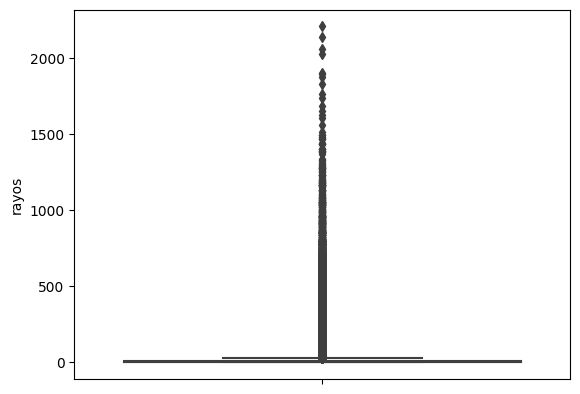

In [84]:
sns.boxplot(y = df.rayos)

Esta visualización no es muy útil porque la caja del rango intercuartil está aplastada en la parte inferior. Esto se debe a que los valores atípicos superiores ocupan todo el espacio. Hagámoslo de nuevo, pero esta vez estableceremos  `showfliers=False`  para que no se incluyan los valores atípicos.

<Axes: ylabel='rayos'>

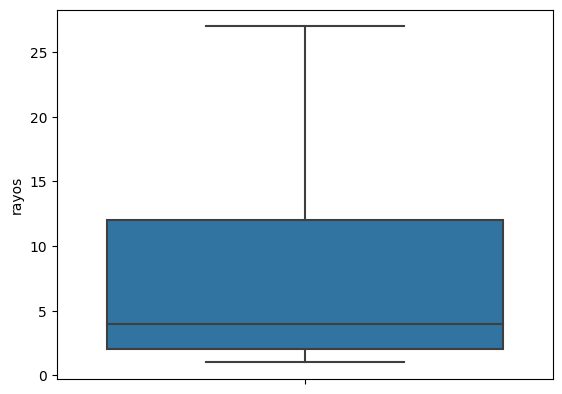

In [85]:
sns.boxplot(y = df.rayos, showfliers=False)

¡Mucho mejor! El rango intercuartil es aproximadamente de 2 a 12 rayos. Pero sabemos por el diagrama de caja anterior que hay muchos días atípicos que tienen cientos o incluso miles de rayos. Este ejercicio nos ayudó a asegurarnos de que la mayoría de las fechas en nuestros datos tuvieran valores plausibles para el número de rayos.

### Validar las columnas `latitud` y `longitud`

Finalmente, crearemos un diagrama de dispersión de todas las coordenadas geográficas donde hubo rayos en 2018. Graficaremos los puntos en un mapa para asegurarnos de que los puntos en los datos sean relevantes y no estén en ubicaciones inesperadas. Debido a que esto puede ser un proceso computacionalmente intensivo, evitaremos cálculos redundantes eliminando las filas que tienen los mismos valores en sus columnas  `latitud`  y  `longitud` . Podemos hacer esto porque el propósito aquí es examinar las ubicaciones donde hubo rayos, pero no importa cuántos rayos tuvieron o cuándo.

In [86]:
# Creamos un nuevo df con solo las combinaciones de latitudes y longitudes unicas
df_points = df[['latitud', 'longitud']].drop_duplicates() 
df_points.head()

latitud  longitud
0     27.0     -75.0
1     29.0     -78.4
2     27.0     -73.9
3     27.0     -73.8
4     28.0     -79.0

**Nota:** La salida de la siguiente celda se puede ver de dos formas: puedes volver a ejecutar esta celda o convertir manualmente el cuaderno en "Confiable".

In [69]:
import plotly.express as px

In [87]:
p = px.scatter_geo(df_points, lat = 'latitud', lon = 'longitud')
p.show()

El gráfico indica que los rayos ocurrieron principalmente en Estados Unidos, pero también hubo muchos rayos en el sur de Canadá, México y el Caribe. Podemos hacer clic y mover el mapa, y también hacer zoom para obtener una mejor resolución de los puntos de rayos.